In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


#to make float numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

# to show all columns on outputs
pd.set_option('display.max_columns', 999)

# to ignore warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel("online_retail_II.xlsx", sheet_name=0)
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


#### Additional Variable Information ####


- InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation. 
- StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product
- Description: Product (item) name. Nominal. 
- Quantity: The quantities of each product (item) per transaction. Numeric.	
- InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated. 
- UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£). 
- CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer. 
- Country: Country name. Nominal. The name of the country where a customer resides.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [4]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


In [5]:
#describe for object

df.describe(include='object')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [6]:
# Checking null values

df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [7]:
#find "Customer ID" that is NULL/NA/NAN
df[df['Customer ID'].isna()].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom


In [8]:
#find "Quantity" lower than 0
df[df['Quantity']<0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


In [9]:
# Invoice is Nominal. A 6-digit integral number uniquely assigned to each transaction. 
# If this code starts with the letter 'c', it indicates a cancellation.
# find Invoice does follow the information above
df["Invoice"] = df["Invoice"].astype("str")
df[df["Invoice"].str.match("\d{6}") == True]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [10]:
#Find Invoice does NOT follow the information above
df["Invoice"] = df["Invoice"].astype("str")
df[df["Invoice"].str.match("\D") == True]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


In [11]:
#find another Invoice that start with a letter
first_letters = df['Invoice'].str.extract(r'^([A-Z])', expand=True)[0]
first_letters.unique()

array([nan, 'C', 'A'], dtype=object)

In [12]:
# find Incoive Start with letter C
df[df['Invoice'].str.startswith(r'C')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


In [13]:
# find Incoive Start with letter A
df[df['Invoice'].str.startswith(r'A')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [14]:
# StockCode is Nominal. A 5-digit integral number uniquely assigned to each distinct product
# find StockCode that does not follow the information of StockCode
df["StockCode"] = df["StockCode"].astype("str")
df[df["StockCode"].str.match("^\d{5}")== False]["StockCode"].unique()


array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', 'C3', 'SP1002', 'AMAZONFEE'], dtype=object)

In [15]:
# verifying one of StockCode does not follow the StockCode Information
# for example C3 does not follows the StockCode Information
df[df["StockCode"].str.contains("^C3")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
302041,518785,C3,NaN,-4999,2010-08-11 16:55:00,0.00,NaN,United Kingdom


## Data Cleaning ##

In [16]:
# make a copy of DataFrame
copy_df=df.copy()

In [17]:
#clean Invoice column
copy_df["Invoice"] = copy_df["Invoice"].astype("str")

filter = (copy_df["Invoice"].str.match("\d{6}") == True)

copy_df = copy_df[filter]
copy_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [18]:
#cleaning StockCode

copy_df["StockCode"]=copy_df["StockCode"].astype("str")

filter = (copy_df["StockCode"].str.match("^\d{5}")== True)

copy_df=copy_df[filter]
copy_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [19]:
# Removing null Customer ID
copy_df.dropna(subset=["Customer ID"], inplace=True)

In [20]:
copy_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406323.00,406323,406323.00,406323.00
mean,13.62,2010-07-01 10:14:46.649094656,2.99,15373.66
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14004.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.37


In [21]:
# to find how much 'Price' is 0 value
len(copy_df[copy_df["Price"]== 0])

28

In [22]:
# only use 'Price' value greater than 0.0
copy_df = copy_df[copy_df["Price"] > 0.0]

# verifying if theres any 'Price' value is 0
len(copy_df[copy_df["Price"]== 0])

0

In [23]:
copy_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406295.00,406295,406295.00,406295.00
mean,13.62,2010-07-01 10:18:05.997415424,2.99,15373.75
min,1.00,2009-12-01 07:45:00,0.03,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14006.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.33


In [24]:
# Checking null values after cleaning

copy_df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

## Exploratory

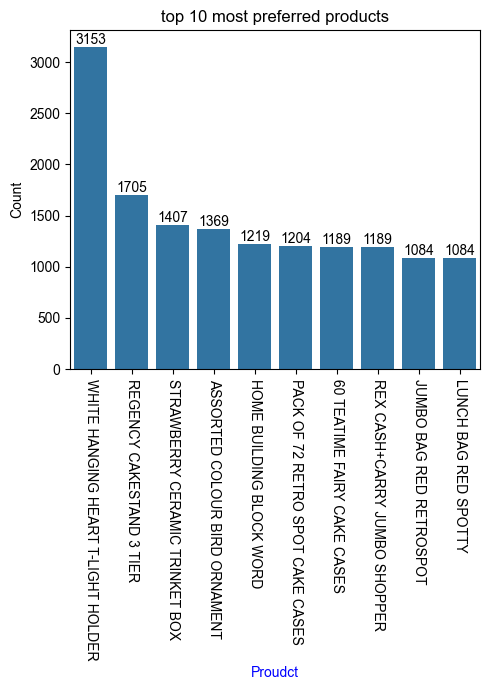

In [25]:
# find 10 most preferred products
most_preferred_product=copy_df['Description'].value_counts()[:10]

#barplot

fig, ax=plt.subplots(figsize=(5,7))

sns.barplot(x=most_preferred_product.index, y=most_preferred_product.values, ax=ax)
for container in ax.containers:
    ax.bar_label(container)
sns.set_style('whitegrid')
plt.ylabel('Count', color='black')
plt.xlabel('Proudct',color='blue')
plt.title('top 10 most preferred products')
plt.xticks(rotation = -90, horizontalalignment = 'center')

plt.tight_layout()
plt.show()


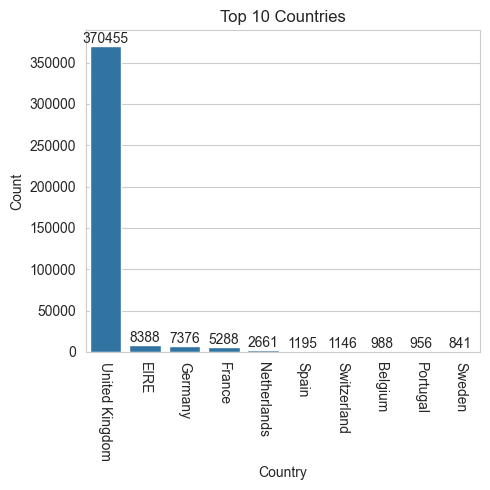

In [78]:
# top 10 highest customers
df_countries=copy_df['Country'].value_counts()[:10]

#barplot
fig, ax=plt.subplots(figsize=(5,5))

sns.barplot(x=df_countries.index, y=df_countries.values, ax=ax)
for container in ax.containers:
    ax.bar_label(container)
sns.set_style('whitegrid')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Countries')
plt.xticks( rotation=-90, horizontalalignment='center')

plt.tight_layout()
plt.show()


In [27]:
# multiply Quatity with Price column to get Amout
copy_df['Amount']=copy_df['Quantity']*copy_df['Price']

copy_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,7.50


In [28]:
# Breaking InvoiceDate column
copy_df['year']=copy_df['InvoiceDate'].dt.year
copy_df['month']=copy_df['InvoiceDate'].dt.strftime('%B')
copy_df['day']=copy_df['InvoiceDate'].dt.strftime('%A')
copy_df['time']=copy_df['InvoiceDate'].dt.strftime('%H')
copy_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Amount,year,month,day,time
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40,2009,December,Tuesday,07
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00,2009,December,Tuesday,07
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00,2009,December,Tuesday,07
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80,2009,December,Tuesday,07
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00,2009,December,Tuesday,07


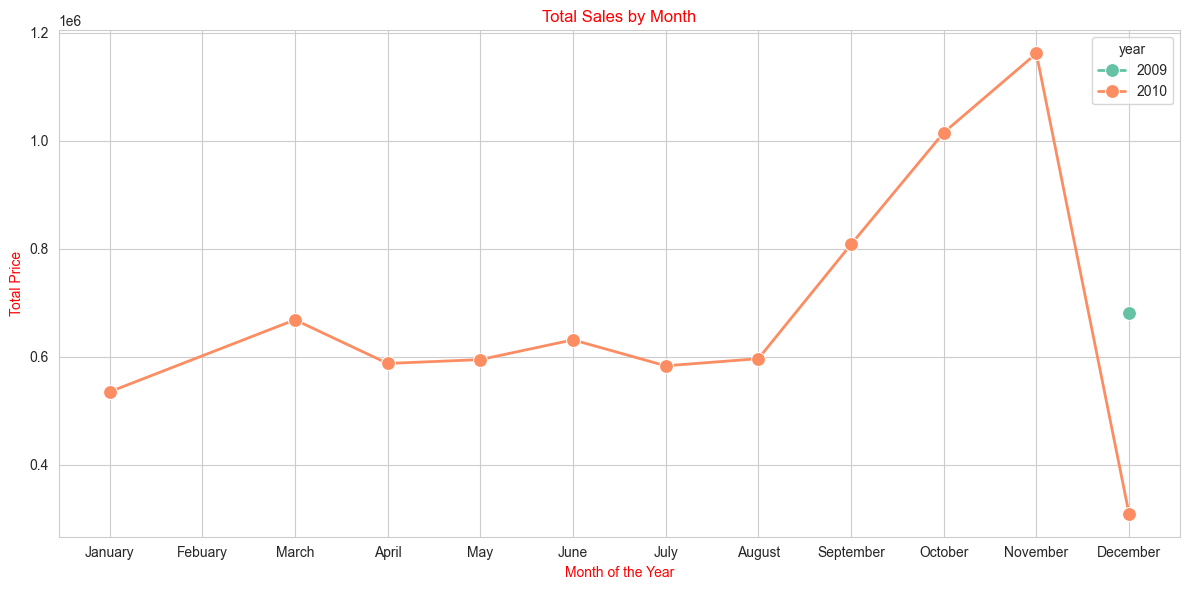

In [29]:
# Total Sales by month

# month order
month_order=['January','Febuary','March','April','May','June',
             'July','August','September','October','November','December']

df_month=copy_df.groupby(['month','year'], as_index=False).agg({'Amount':'sum'})

df_month['month']=pd.Categorical(df_month['month'], categories=month_order, ordered=True)

plt.figure(figsize=(12,6))
sns.lineplot(data=df_month,x='month',y='Amount', 
             marker='o', color='magenta',hue='year', 
             linewidth=2, palette='Set2', markersize=10)
sns.set_style('whitegrid')
plt.title('Total Sales by Month',color='red')
plt.xlabel('Month of the Year',color='red')
plt.ylabel('Total Price',color='red')

plt.tight_layout()
plt.show()


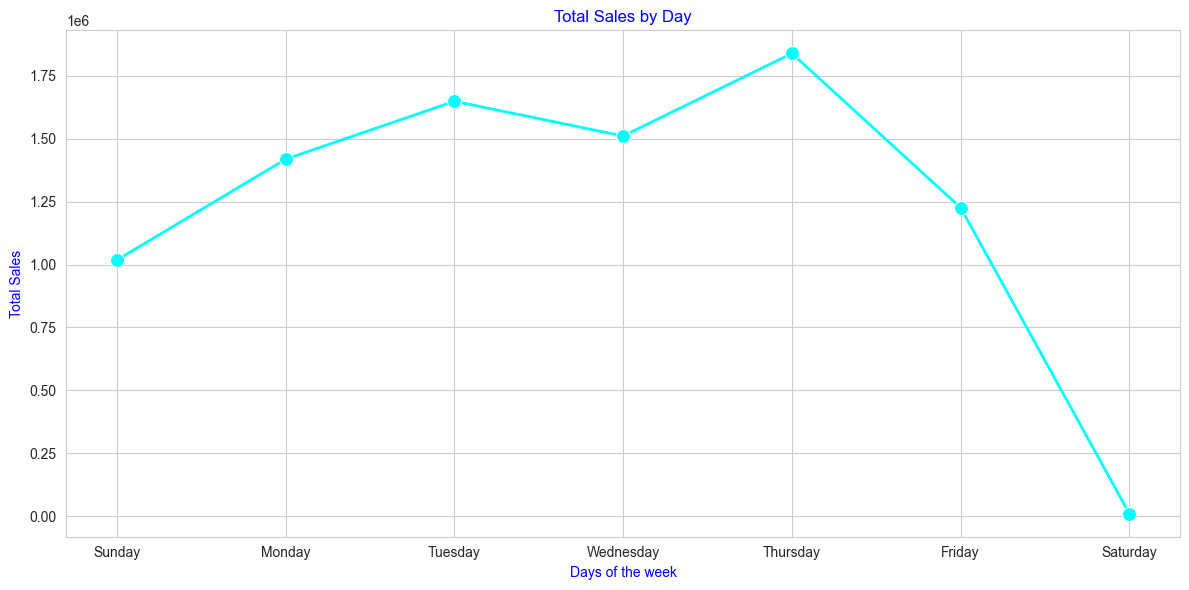

In [30]:
# Total Sales on a daily basis

# day order
day_order=['Sunday','Monday','Tuesday','Wednesday',
          'Thursday','Friday','Saturday']

df_day=copy_df.groupby('day', as_index=False).agg({'Amount':'sum'})

df_day['day']=pd.Categorical(df_day['day'], categories=day_order, ordered=True)

plt.figure(figsize=(12,6))
sns.lineplot(data=df_day, x='day', y='Amount',
             marker='o', color='cyan',
             linewidth=2, markersize=10)
plt.title('Total Sales by Day',color='blue')
plt.xlabel('Days of the week', color='blue')
plt.ylabel('Total Sales', color='blue')

plt.tight_layout()
plt.show()

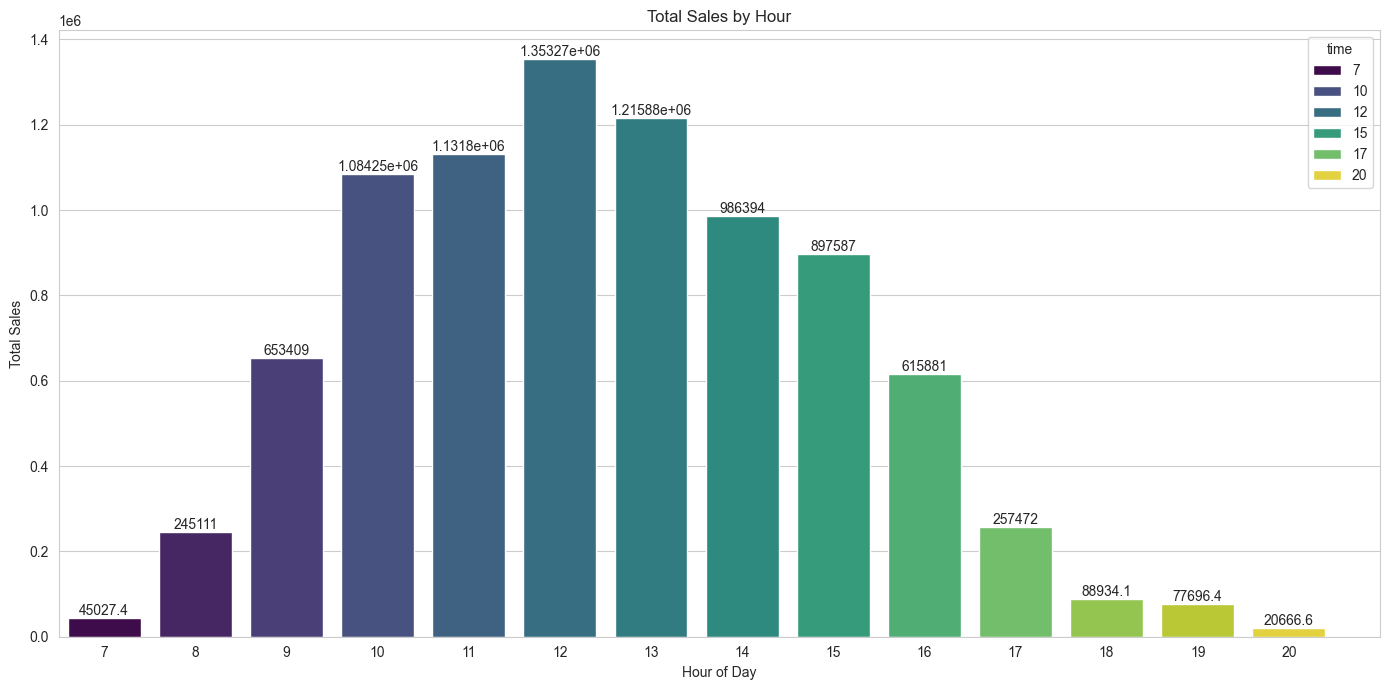

In [31]:
# Total Sales by Hour


# Group and reset index for seaborn
hourly_sales = copy_df.groupby('time', as_index=False)['Amount'].sum()
hourly_sales['time']=hourly_sales['time'].astype(int)

# Plot
plt.figure(figsize=(14, 7))
ax=sns.barplot(data=hourly_sales, x='time', y='Amount', 
            palette='viridis', hue='time')
for container in ax.containers:
    ax.bar_label(container)
sns.set_style('whitegrid')
plt.title('Total Sales by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.xticks(range(0, 15)) # tick label from 0 to 14


plt.tight_layout()
plt.show()


## Clustering ##

In [32]:
#aggregate the DataFrame by Customer ID
# Sum of the Amount in every CustomerID
# Count unique value of Invoice in every CustomerID
# Maximal value of InvoiceDate in every CustomerID

agg_df=copy_df.groupby(by="Customer ID", as_index=False).agg(
    CostValue=("Amount","sum"),
    Frequency=("Invoice","nunique"),
    LastInvoiceDate=("InvoiceDate","max")
)

agg_df

,Customer ID,CostValue,Frequency,LastInvoiceDate
0,12346.00,169.36,2,2010-06-28 13:53:00
1,12347.00,1323.32,2,2010-12-07 14:57:00
2,12348.00,221.16,1,2010-09-27 14:59:00
3,12349.00,2221.14,2,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00
...,...,...,...,...
4280,18283.00,641.77,6,2010-11-22 15:30:00
4281,18284.00,411.68,1,2010-10-04 11:33:00
4282,18285.00,377.00,1,2010-02-17 10:24:00
4283,18286.00,1246.43,2,2010-08-20 11:57:00


In [33]:
# Find the Most last date in LastInvoiceDate column

Most_last_InvoiceDate=agg_df["LastInvoiceDate"].max()
Most_last_InvoiceDate


Timestamp('2010-12-09 20:01:00')

In [34]:
# recency is (Most Last InvoiceDate) - (LastInvoiceDate in every CustomerID)
# recency only using days

agg_df["Recency"]=(Most_last_InvoiceDate - agg_df["LastInvoiceDate"]).dt.days
agg_df

,Customer ID,CostValue,Frequency,LastInvoiceDate,Recency
0,12346.00,169.36,2,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,2221.14,2,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10
...,...,...,...,...,...
4280,18283.00,641.77,6,2010-11-22 15:30:00,17
4281,18284.00,411.68,1,2010-10-04 11:33:00,66
4282,18285.00,377.00,1,2010-02-17 10:24:00,295
4283,18286.00,1246.43,2,2010-08-20 11:57:00,111


In [35]:
agg_df.describe()

,Customer ID,CostValue,Frequency,LastInvoiceDate,Recency
count,4285.00,4285.00,4285.00,4285,4285.00
mean,15356.81,2024.13,4.43,2010-09-11 00:06:10.431738624,89.55
min,12346.00,1.55,1.00,2009-12-01 10:49:00,0.00
25%,13891.00,307.56,1.00,2010-07-27 14:39:00,17.00
50%,15362.00,702.90,2.00,2010-10-19 12:10:00,51.00
75%,16840.00,1704.29,5.00,2010-11-22 11:24:00,135.00
max,18287.00,349164.35,183.00,2010-12-09 20:01:00,373.00
std,1699.84,8813.95,7.94,NaN,96.36


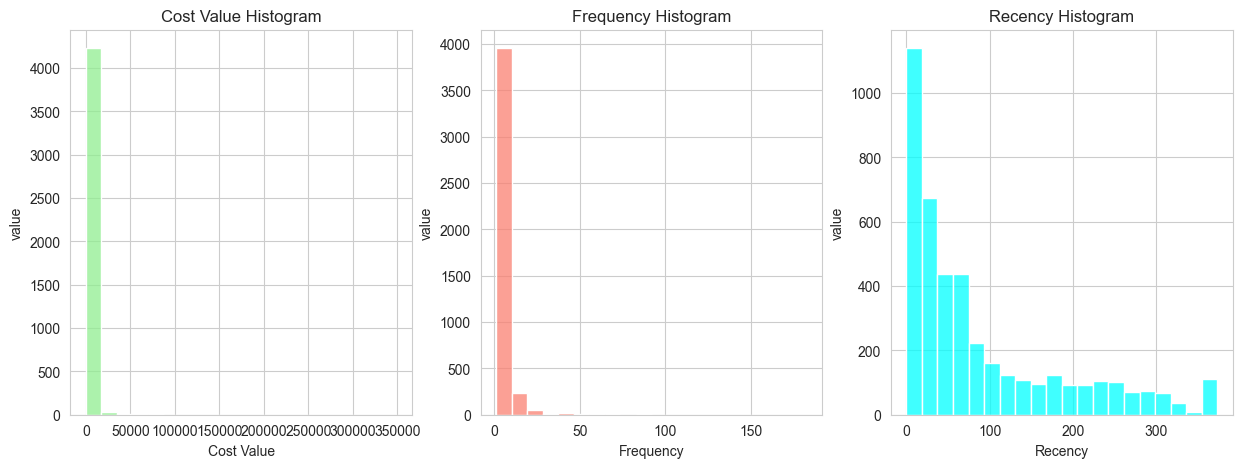

In [36]:
# using histogram to look whole distributions of CostValue, Frequency and Recency

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.histplot(agg_df["CostValue"], bins=20, color="lightgreen")
plt.title("Cost Value Histogram")
plt.xlabel("Cost Value")
plt.ylabel("value")

plt.subplot(1,3,2)
sns.histplot(agg_df["Frequency"], bins=20, color="salmon")
plt.title("Frequency Histogram")
plt.xlabel("Frequency")
plt.ylabel("value")

plt.subplot(1,3,3)
sns.histplot(agg_df["Recency"], bins=20, color="cyan")
plt.title("Recency Histogram")
plt.xlabel("Recency")
plt.ylabel("value")


plt.tight_layout
plt.show()

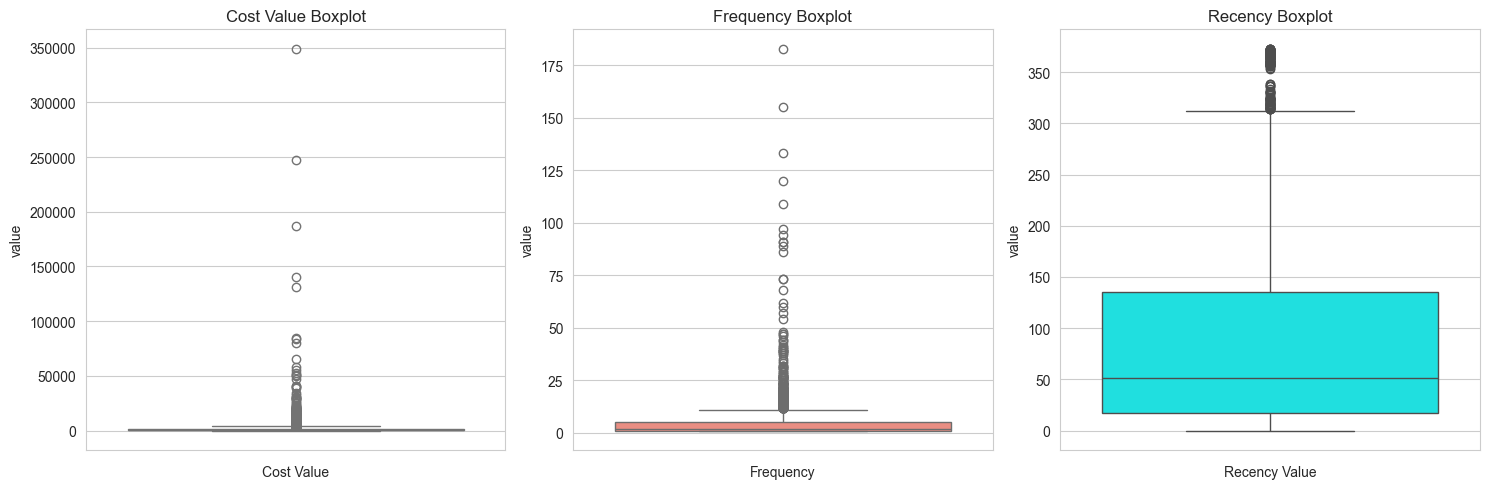

In [37]:
# using Box Plot to find Outlier in every column
# use sns for modern visual

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(agg_df["CostValue"], color="lightgreen")
plt.title("Cost Value Boxplot")
plt.xlabel("Cost Value")
plt.ylabel("value")

plt.subplot(1,3,2)
sns.boxplot(agg_df["Frequency"], color="salmon")
plt.title("Frequency Boxplot")
plt.xlabel("Frequency")
plt.ylabel("value")

plt.subplot(1,3,3)
sns.boxplot(agg_df["Recency"], color="cyan")
plt.title("Recency Boxplot")
plt.xlabel("Recency Value")
plt.ylabel("value")


plt.tight_layout()
plt.show()


In [38]:
# Outlier in CostValue
# separating Oulier and only using Interquartile Range (IQR) +- 1.5
# IQR is 25th to 75th percentile
# the upper and lower bound is times 1.5 of 25th and 75th percentile

c25 = agg_df['CostValue'].quantile(0.25)
c75 = agg_df['CostValue'].quantile(0.75)
c_IQR = c75 - c25

outlier_CostValue_df = agg_df[(agg_df['CostValue'] < (c25 - 1.5 * c_IQR)) | (agg_df['CostValue'] > (c75 + 1.5 * c_IQR))]

outlier_CostValue_df.describe()

,Customer ID,CostValue,Frequency,LastInvoiceDate,Recency
count,423.00,423.00,423.00,423,423.00
mean,15103.04,12188.10,17.17,2010-11-09 12:26:02.978723328,30.04
min,12357.00,3802.04,1.00,2009-12-10 18:03:00,0.00
25%,13622.00,4605.94,8.00,2010-11-08 13:17:30,3.00
50%,14961.00,6191.32,12.00,2010-11-26 12:19:00,13.00
75%,16692.00,10273.24,18.00,2010-12-06 10:34:30,31.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,364.00
std,1728.66,25830.85,19.73,NaN,51.54


In [39]:
# Outlier in Frequency
# separating Oulier and only using Interquartile Range (IQR) +- 1.5
# IQR is 25th to 75th percentile
# the upper and lower bound is times 1.5 of 25th and 75th percentile

c25 = agg_df['Frequency'].quantile(0.25)
c75 = agg_df['Frequency'].quantile(0.75)
c_IQR = c75 - c25

outlier_Frequency_df = agg_df[(agg_df['Frequency'] < (c25 - 1.5 * c_IQR)) | (agg_df['Frequency'] > (c75 + 1.5 * c_IQR))]

outlier_Frequency_df.describe()

,Customer ID,CostValue,Frequency,LastInvoiceDate,Recency
count,279.00,279.00,279.00,279,279.00
mean,15352.66,14409.71,23.81,2010-11-23 11:06:20.645161216,16.09
min,12437.00,1094.39,12.00,2010-05-12 16:51:00,0.00
25%,13800.00,4331.56,13.00,2010-11-20 13:14:30,2.00
50%,15465.00,6615.77,17.00,2010-12-02 10:46:00,7.00
75%,16828.50,11692.41,23.00,2010-12-07 11:08:30,19.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,211.00
std,1748.43,31381.74,21.93,NaN,26.59


In [40]:
# Outlier in Recency
# separating Oulier and only using Interquartile Range (IQR) +- 1.5
# IQR is 25th to 75th percentile
# the upper and lower bound is times 1.5 of 25th and 75th percentile

c25 = agg_df['Recency'].quantile(0.25)
c75 = agg_df['Recency'].quantile(0.75)
c_IQR = c75 - c25

outlier_Recency_df = agg_df[(agg_df['Recency'] < (c25 - 1.5 * c_IQR)) | (agg_df['Recency'] > (c75 + 1.5 * c_IQR))]

outlier_Recency_df.describe()

,Customer ID,CostValue,Frequency,LastInvoiceDate,Recency
count,167.00,167.00,167.00,167,167.00
mean,15429.03,418.32,1.25,2009-12-23 13:52:27.664670720,350.97
min,12439.00,2.95,1.00,2009-12-01 10:49:00,314.00
25%,14115.50,147.35,1.00,2009-12-07 13:03:00,328.50
50%,15413.00,231.90,1.00,2009-12-14 15:07:00,360.00
75%,16812.00,356.18,1.00,2010-01-14 23:56:00,367.00
max,18201.00,9471.50,7.00,2010-01-29 14:22:00,373.00
std,1629.84,950.15,0.80,NaN,20.51


In [41]:
# find non Outlier
non_Outlier_df = agg_df[                               \
    (~agg_df.index.isin(outlier_CostValue_df.index)) & \
    (~agg_df.index.isin(outlier_Frequency_df.index)) & \
    (~agg_df.index.isin(outlier_Recency_df.index))     \
]

non_Outlier_df.describe()

,Customer ID,CostValue,Frequency,LastInvoiceDate,Recency
count,3645.00,3645.00,3645.00,3645,3645.00
mean,15373.85,911.70,2.94,2010-09-14 21:43:02.716049408,85.65
min,12346.00,1.55,1.00,2010-01-31 12:19:00,0.00
25%,13900.00,295.05,1.00,2010-08-02 12:42:00,21.00
50%,15387.00,615.20,2.00,2010-10-15 12:30:00,55.00
75%,16854.00,1307.40,4.00,2010-11-18 12:11:00,129.00
max,18287.00,3788.21,11.00,2010-12-09 20:01:00,312.00
std,1695.68,824.09,2.26,NaN,83.68


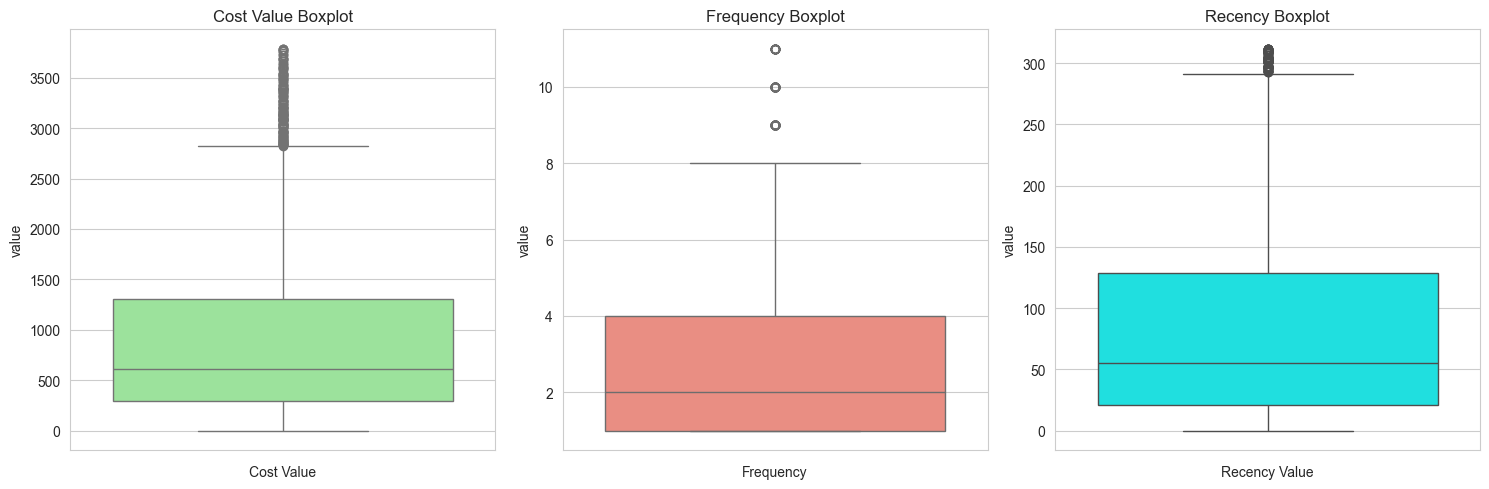

In [42]:
# Boxplot for non Outlier DataFrame
# use sns for modern visual

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(non_Outlier_df['CostValue'], color="lightgreen")
plt.title("Cost Value Boxplot")
plt.xlabel("Cost Value")
plt.ylabel("value")

plt.subplot(1,3,2)
sns.boxplot(non_Outlier_df['Frequency'], color="salmon")
plt.title("Frequency Boxplot")
plt.xlabel("Frequency")
plt.ylabel("value")

plt.subplot(1,3,3)
sns.boxplot(non_Outlier_df['Recency'], color="cyan")
plt.title("Recency Boxplot")
plt.xlabel("Recency Value")
plt.ylabel("value")


plt.tight_layout()
plt.show()


In [43]:
# Scaling DataFrame
obj = StandardScaler()

scaler = obj.fit_transform(non_Outlier_df[['CostValue','Frequency','Recency']])

scaler


array([[-0.90092362, -0.4152271 ,  0.93643734],
       [ 0.49954809, -0.4152271 , -0.9997201 ],
       [-0.83805798, -0.85751312, -0.15115727],
       ...,
       [-0.64892707, -0.85751312,  2.50209551],
       [ 0.40623267, -0.4152271 ,  0.30300311],
       [ 1.67966239,  0.46934495, -0.82044626]])

In [44]:
# converting array values into new DataFrame named scaled_df
scaled_df = pd.DataFrame(scaler, index=non_Outlier_df.index, columns=('CostValue','Frequency','Recency'))

scaled_df.head(5)

,CostValue,Frequency,Recency
0,-0.90,-0.42,0.94
1,0.50,-0.42,-1.00
2,-0.84,-0.86,-0.15
3,1.59,-0.42,-0.52
4,-0.74,-0.86,-0.90


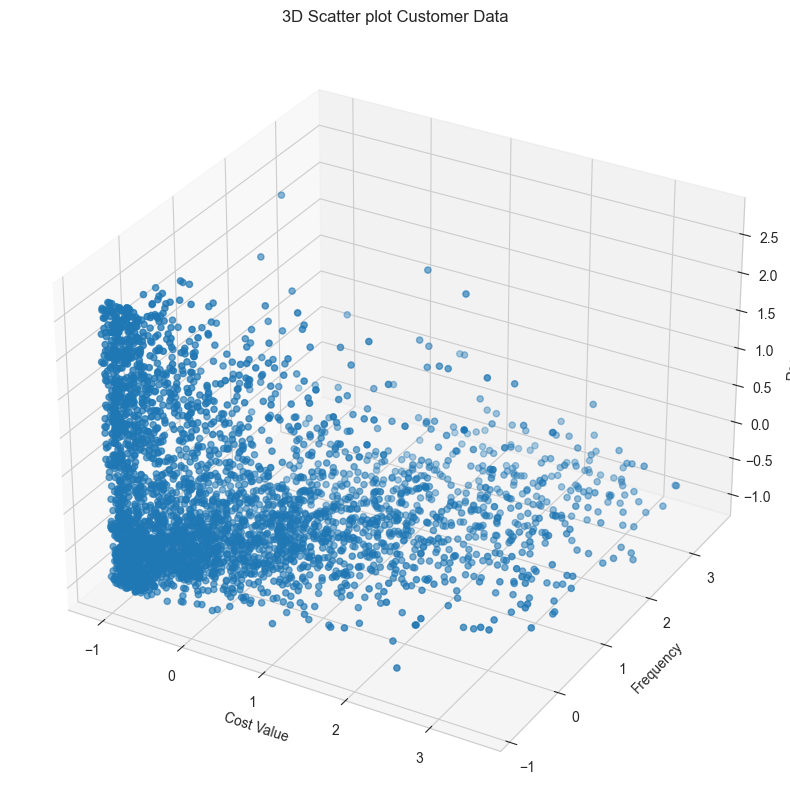

In [45]:
# 3d scatter plot
fig = plt.figure(figsize=(10,10))

axis = fig.add_subplot(projection="3d")

scatter = axis.scatter(scaled_df['CostValue'],scaled_df['Frequency'],scaled_df['Recency'])

axis.set_xlabel('Cost Value')
axis.set_ylabel('Frequency')
axis.set_zlabel('Recency')

axis.set_title("3D Scatter plot Customer Data")

plt.show()

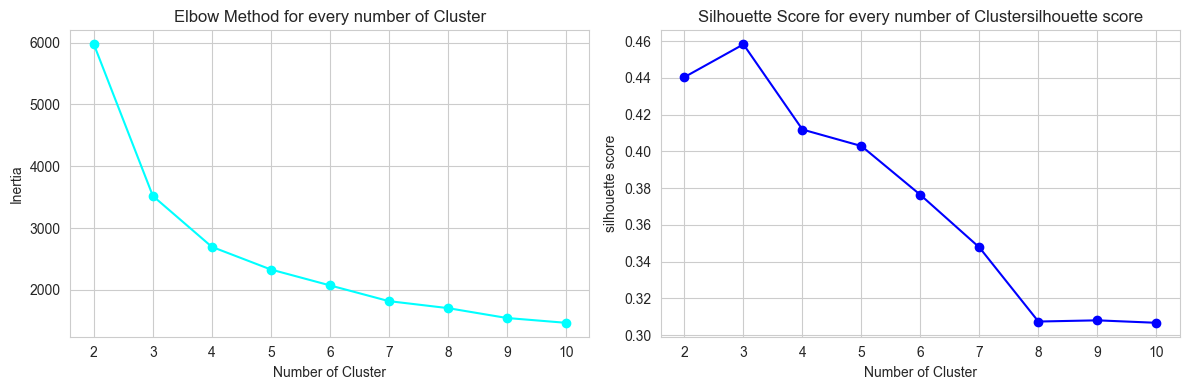

In [46]:
# find optimal clsuter using elbow method and silhouette score
# Using Optimum Cluster, the 'elbow point' in the Elbow Method is between 4 and 5
# Validate optimum cluster using Silhouette Score, 4 Cluster is higher silhouette point than 5 Cluster
# Final Cluster is 4

max_k= 10
inertia=[]
sil_score=[]
k_val=range(2,max_k+1)

for k in k_val:
    
    kmeans=KMeans(n_clusters=k, random_state=42)
    label = kmeans.fit_predict(scaled_df)
    score=silhouette_score(scaled_df,label)
    inertia.append(kmeans.inertia_)
    sil_score.append(score)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(k_val, inertia, marker='o', color='cyan')
plt.title("Elbow Method for every number of Cluster")
plt.xlabel("Number of Cluster")
plt.ylabel("Inertia")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(k_val, sil_score, marker='o', color='blue')
plt.title("Silhouette Score for every number of Clustersilhouette score")
plt.xlabel("Number of Cluster")
plt.ylabel("silhouette score")
plt.grid(True)

plt.tight_layout()
plt.show()



In [47]:
# Apply K-Means Clustering to the Scaled dataframe with optimal Cluster

kmeans = KMeans(random_state=42,n_clusters=4)
label = kmeans.fit_predict(scaled_df)

label


array([1, 3, 2, ..., 1, 3, 3])

In [48]:
# Insert values from an 'label' array as a new column called 'cluster' into non_Outlier_df
non_Outlier_df['Cluster']=label
non_Outlier_df.head(5)

,Customer ID,CostValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,3
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,3
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2


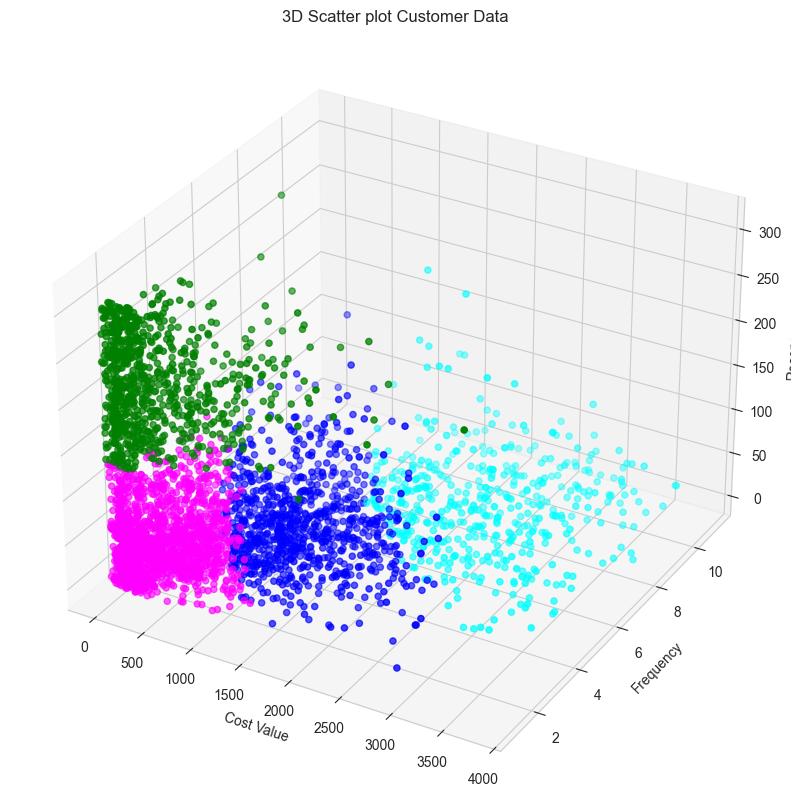

In [49]:
# visualize in 3d Scatter plot
# using color map
color_cluster={
    0:'#00FFFF', #cyan
    1:'#008000', #green
    2:'#FF00FF', #magenta
    3:'#0000FF',  #blue
    4: '#FA8072', #salmon
    5: '#993300', #Red
    6: '#ffff00', #yellow
    7: '#cc33ff' #purple
                  
    
}
color=non_Outlier_df['Cluster'].map(color_cluster)

fig = plt.figure(figsize=(10,10))

axis = fig.add_subplot(projection="3d")

scatter = axis.scatter(non_Outlier_df['CostValue'],non_Outlier_df['Frequency'],non_Outlier_df['Recency'],
                       c=color,marker='o')

axis.set_xlabel('Cost Value')
axis.set_ylabel('Frequency')
axis.set_zlabel('Recency')

axis.set_title("3D Scatter plot Customer Data")

plt.show()

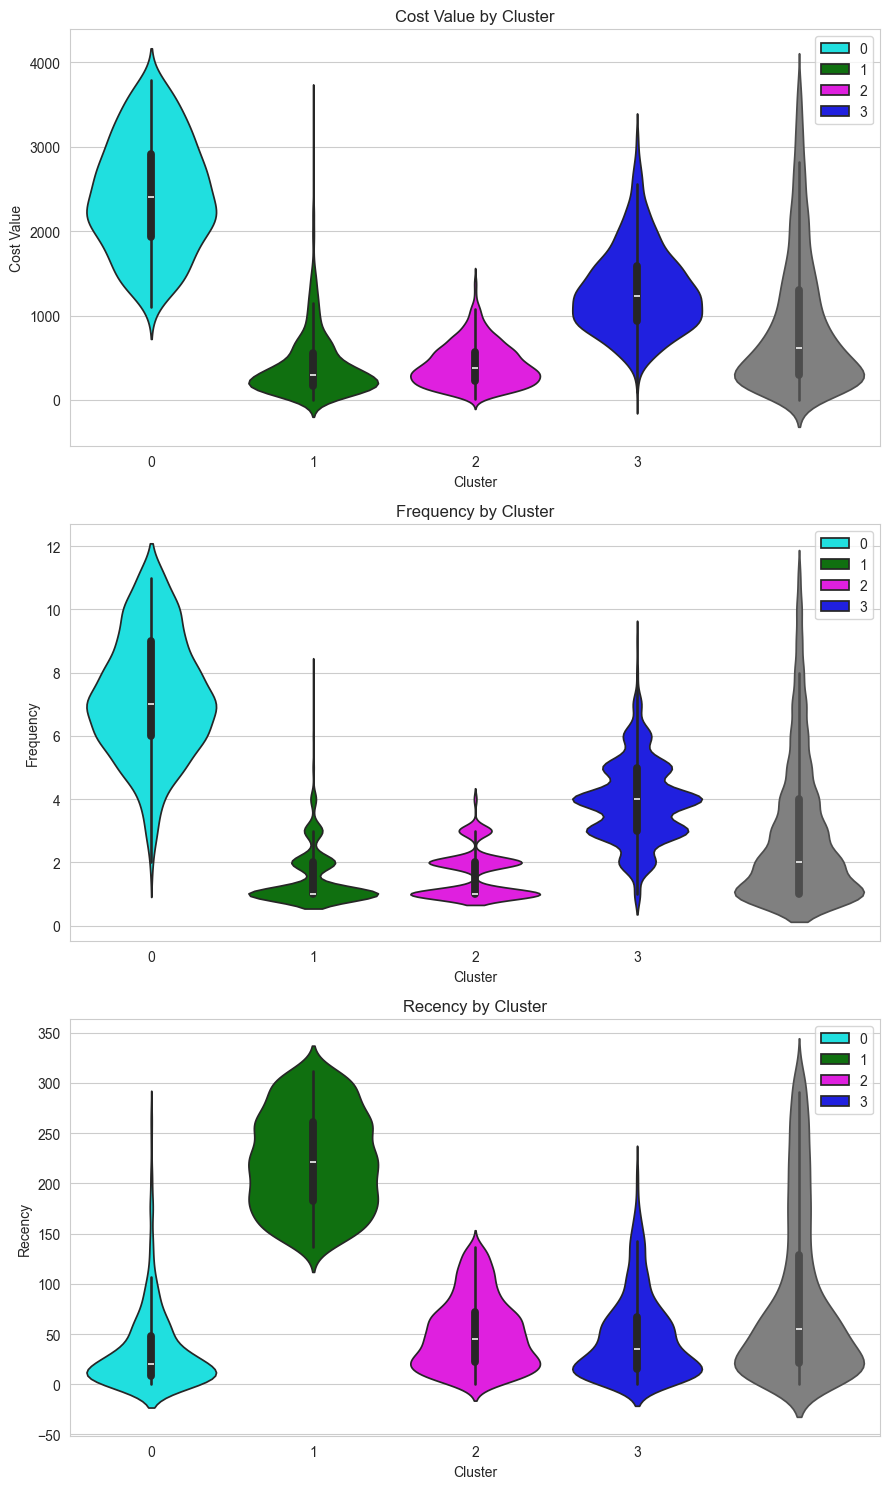

In [50]:
# Visualizing each cluster base on Costvalue, Frequency and Recency
# using Violin plot
plt.figure(figsize=(9,15))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_Outlier_df['Cluster'], 
               y=non_Outlier_df['CostValue'], 
               palette=color_cluster, hue=non_Outlier_df['Cluster'])
sns.violinplot(y=non_Outlier_df['CostValue'], color='gray')
plt.title('Cost Value by Cluster')
plt.ylabel('Cost Value')

plt.subplot(3,1,2)
sns.violinplot(x=non_Outlier_df['Cluster'],
               y=non_Outlier_df['Frequency'],
               palette=color_cluster, hue=non_Outlier_df['Cluster'])
sns.violinplot(y=non_Outlier_df['Frequency'], color='gray')
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3,1,3)
sns.violinplot(x=non_Outlier_df['Cluster'],
               y=non_Outlier_df['Recency'],
               palette=color_cluster, hue=non_Outlier_df['Cluster'])
sns.violinplot(y=non_Outlier_df['Recency'], color='gray')
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

#### **Interpret what cluster represent**

__Cluster 0 (Cyan) "Bonus"__
* This cluster comprises buyers with very high value and purchase frequently, all of whom have made recent transactions. They are the most loyal buyers, and offering bonuses for their loyalty helps strengthen the relationship
* Actions : Exlusive Discounts & Offers to provide special discount and early access to sales, Loyality Programs, Cashback and Gifts


__cluster 1 (Green) "Reconnect"__
* This cluster consists of infrequent, low-value buyers who make occasional purchases and have not bought anything recently. The focus is on reconnecting with buyers to motivate their return to active purchasing.
* Actions : Engaging Email & SMS  to remind about the product, Special Discount, Reactivation Campaigns to encourage them to return

__Cluster 2 (Magenta) "Growth"__
* This cluster consists of lower-value buyers who purchase occasionally and have bought recently. The focus is on building engagement and spending to sustain growth.
* Actions : Focus on building relatisonhips, Exceptional Customer Service to provide fast and reliable support

__Cluster 3 (Blue) "Preserve"__ /preserve
* This cluster includes high-value buyers who purchase frequently and have made recent transactions. The focus is on preserving customer loyalty and purchases
* Actions : Loyalty Programs to offer rewards, Personalized Engagement to serve special discount and recomendation

##### **Summary of Cluster Names** 
* Cluster 0 (Cyan) : "Bonus"
* cluster 1 (Green) : "Reconnect"
* Cluster 2 (Magenta) : "Growth"
* Cluster 3 (Blue) : "Preserve"


# Clustering Outlier

In [65]:
# clustering for outlier df
# merger datafrme outlier_Frequency_df, outlier_CostValue_df and outlier_Recency_df
# remove overlapping duplicate data in these 3 df

outlier_df=pd.concat([outlier_CostValue_df,outlier_Frequency_df,outlier_Recency_df]).drop_duplicates()
outlier_df.describe()

,Customer ID,CostValue,Frequency,LastInvoiceDate,Recency
count,640.00,640.00,640.00,640,640.00
mean,15259.75,8359.73,12.90,2010-08-19 18:56:20.156250112,111.76
min,12357.00,2.95,1.00,2009-12-01 10:49:00,0.00
25%,13823.75,1142.23,2.00,2010-01-28 14:08:45,7.00
50%,15183.50,4577.02,10.00,2010-11-16 14:16:30,23.00
75%,16756.25,7381.89,15.00,2010-12-02 18:38:15,315.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,373.00
std,1721.45,21672.28,17.57,NaN,147.43


In [66]:
# Scaling Outlier DataFrame
obj = StandardScaler()

scaler = obj.fit_transform(outlier_df[['CostValue','Frequency','Recency']])


# converting array values into new DataFrame named scaled_outlier_df
scaled_outlier_df = pd.DataFrame(scaler, index=outlier_df.index, columns=('CostValue','Frequency','Recency'))

scaled_outlier_df.head(5)


,CostValue,Frequency,Recency
9,0.13,-0.68,-0.60
25,-0.17,-0.51,-0.08
42,0.18,-0.51,-0.39
48,0.51,-0.51,-0.69
61,-0.19,-0.11,-0.70


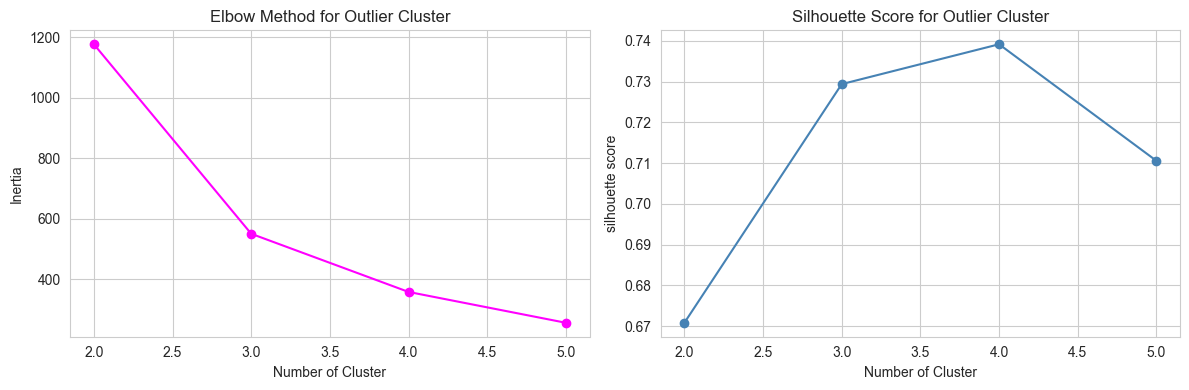

In [67]:
# find optimal clsuter using elbow method and silhouette score
# Using Optimum Cluster, the 'elbow point' in the Elbow Method is between 3 and 4
# Validate optimum cluster using Silhouette Score, 4 Cluster is higher silhouette point than 3 Cluster
# Final Cluster is 4

max_k= 5
inertia=[]
sil_score=[]
k_val=range(2,max_k+1)

for k in k_val:
    
    kmeans=KMeans(n_clusters=k, random_state=42)
    label = kmeans.fit_predict(scaled_outlier_df)
    score=silhouette_score(scaled_outlier_df,label)
    inertia.append(kmeans.inertia_)
    sil_score.append(score)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(k_val, inertia, marker='o', color='fuchsia')
plt.title("Elbow Method for Outlier Cluster")
plt.xlabel("Number of Cluster")
plt.ylabel("Inertia")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(k_val, sil_score, marker='o', color='steelblue')
plt.title("Silhouette Score for Outlier Cluster")
plt.xlabel("Number of Cluster")
plt.ylabel("silhouette score")
plt.grid(True)

plt.tight_layout()
plt.show()



In [68]:
# Apply K-Means Clustering to the Scaled dataframe with optimal Cluster

kmeans = KMeans(random_state=42,n_clusters=4)
label = kmeans.fit_predict(scaled_outlier_df)

# Insert values from an 'label' array as a new column called 'cluster' into outlier_df
outlier_df['Cluster']=label

# modify the cluster number by adding 4
outlier_df['Cluster'] +=4
outlier_df.head()

,Customer ID,CostValue,Frequency,LastInvoiceDate,Recency,Cluster
9,12357.00,11229.99,1,2010-11-16 10:05:00,23,4
25,12380.00,4782.84,4,2010-08-31 14:54:00,100,4
42,12409.00,12346.62,4,2010-10-15 10:24:00,55,4
48,12415.00,19468.84,4,2010-11-29 15:07:00,10,4
61,12431.00,4145.52,11,2010-12-01 10:03:00,8,4


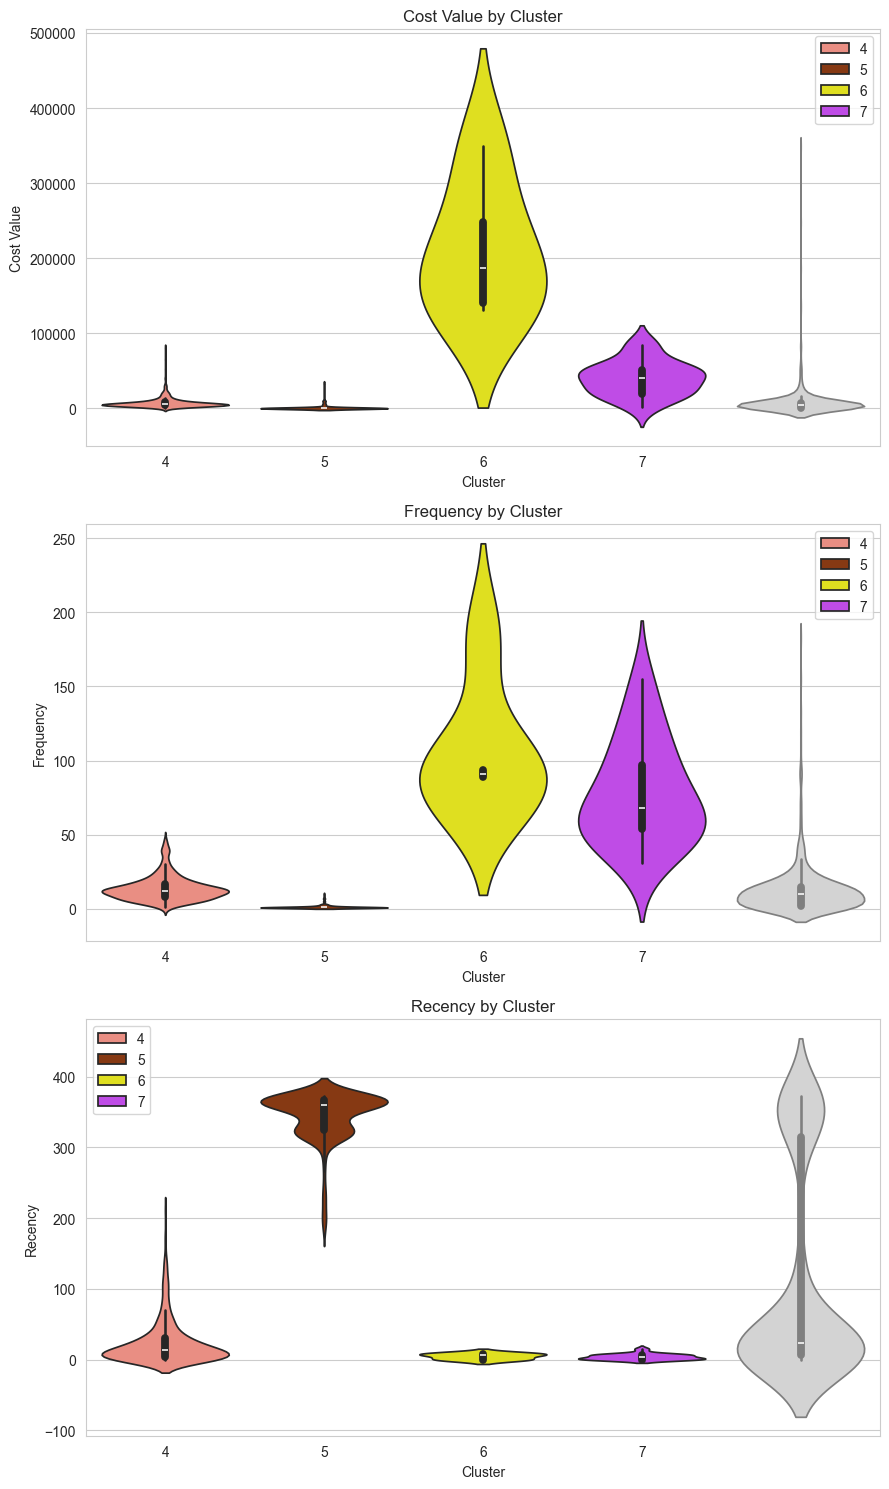

In [69]:
# Visualizing each cluster base on Costvalue, Frequency and Recency
# using Violin plot

plt.figure(figsize=(9,15))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_df['Cluster'], 
               y=outlier_df['CostValue'], 
               palette=color_cluster, hue=outlier_df['Cluster'])
sns.violinplot(y=outlier_df['CostValue'], color='lightgray')
plt.title('Cost Value by Cluster')
plt.ylabel('Cost Value')

plt.subplot(3,1,2)
sns.violinplot(x=outlier_df['Cluster'],
               y=outlier_df['Frequency'],
               palette=color_cluster, hue=outlier_df['Cluster'])
sns.violinplot(y=outlier_df['Frequency'], color='lightgray')
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3,1,3)
sns.violinplot(x=outlier_df['Cluster'],
               y=outlier_df['Recency'],
               palette=color_cluster, hue=outlier_df['Cluster'])
sns.violinplot(y=outlier_df['Recency'], color='lightgray')
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

#### __interpreting the cluster for Outlier__
1. __cluster 4 (salmon) "Casuals"__
* This cluster includes low-value occasional buyer who made purchase recently
* Action : Targeted Ads to keep the brand top of mind and prompt them to return to buy more
2. __cluster 5 (red) "Quiet"__
* This cluster includes those who spend the least and they who make purchases infrequently and haven't bought anything in quite some time
* Action : Win-Back Emails to send remainders with special offers or discount, Personalized Recommendations to suggesr product based on past purchases
3. __cluster 6 (yellow) "Whales"__
* This cluster is the most valuable outlier, characterized by high activity and significant recent purchases. As top-tier customers in your business, they require dedicated attention and engagement
* Action : VIP Membership Programs to offer exclusive perks, Suprised & Delight to send unexpected gift, Premium Bundle, Customized Communication and Spotlight
4. __cluster 7 (purple) "Steady"__
* This Cluster includes buyers who have recenly made frequent purchased though spend less per purchase. These customers maintain steady engagement.
* Action : Bundled Offers to suggest "buy more, save more" deals, Free Shipping Threshold to encourage higher spending by offering free shipping

##### summary of cluster names for outliers
* cluster 4 (salmon) "Casuals"
* cluster 5 (red) "Quiet"
* cluster 6 (yellow) "Whales"
* cluster 7 (purple) "Steady"



In [70]:
# Cluster label to make cluster more meaningful

cluster_labels = {
    0: "BONUS",
    1: "RECONNECT",
    2: "GROWTH",
    3: "PRESERVE",
    4: "CASUALS",
    5: "QUIET",
    6: "WHALES",
    7: "STEADY"
}

# concat all dataframe
full_clustering_df=pd.concat([non_Outlier_df, outlier_df])
full_clustering_df

,Customer ID,CostValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,3
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,3
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4166,18115.00,9.70,1,2010-01-11 11:57:00,332,5
4194,18162.00,379.16,1,2009-12-07 13:24:00,367,5
4209,18186.00,329.58,1,2009-12-17 10:22:00,357,5
4220,18199.00,344.75,1,2010-01-25 11:32:00,318,5


In [71]:
# mapping Cluster Labels to full clustering df
full_clustering_df['Cluster Label']=full_clustering_df['Cluster'].map(cluster_labels)
full_clustering_df

,Customer ID,CostValue,Frequency,LastInvoiceDate,Recency,Cluster,Cluster Label
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1,RECONNECT
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,3,PRESERVE
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2,GROWTH
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,3,PRESERVE
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2,GROWTH
...,...,...,...,...,...,...,...
4166,18115.00,9.70,1,2010-01-11 11:57:00,332,5,QUIET
4194,18162.00,379.16,1,2009-12-07 13:24:00,367,5,QUIET
4209,18186.00,329.58,1,2009-12-17 10:22:00,357,5,QUIET
4220,18199.00,344.75,1,2010-01-25 11:32:00,318,5,QUIET


## Visualisation

In [79]:
# Visualisation using Plotly (px) to creates an interactive chart
# Barplot to Count 

cluster_count=full_clustering_df['Cluster Label'].value_counts()
fig=px.bar(cluster_count,
           x=cluster_count.index, 
           y=cluster_count.values, 
           color=cluster_count.index,
           color_discrete_sequence=px.colors.qualitative.Pastel,
           title='Count Distribution across Cluster',
           text_auto=True)
fig.show()

In [80]:
# Pie Chart to know Cluster Proportion in percentage

fig = px.pie(full_clustering_df, 
             values='Customer ID', 
             names='Cluster Label', 
             title='Customer Percentage across Cluster',
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

In [81]:
# Create an interactive 3D scatter plot

plt.figure(figsize=(17,17))
fig = px.scatter_3d(
    full_clustering_df, x='CostValue', y='Frequency', z='Recency', 
    color='Cluster Label',
    title='K-Means Clusters in 3D Space',
    color_discrete_sequence=px.colors.qualitative.Pastel, opacity=0.7
)

fig.show()

<Figure size 1700x1700 with 0 Axes>

In [82]:
# BoxPlot to show spread, media, quartile and outlier each features within each Cluster

feature=['CostValue','Frequency','Recency']
 
for x, feature in enumerate(feature):
    fig=px.box(full_clustering_df,x='Cluster Label', y=feature, 
               color='Cluster Label', 
               title=f'{feature} by cluster',
               color_discrete_sequence=px.colors.qualitative.Dark24)
    fig.show()

In [83]:
# line plot mean value each features across Cluster
# All Features must be Scaled, which will make the Features more reasonable without changing the original value.

import plotly.graph_objects as go

ftrs = ['Frequency','CostValue','Recency']

sclr = StandardScaler()
full_clustering_df[ftrs] = sclr.fit_transform(full_clustering_df[ftrs])


# Calculate means per cluster
c_means = full_clustering_df.groupby('Cluster Label')[['Frequency','CostValue','Recency']].mean().reset_index()

# Sort by Costvalue
c_means = c_means.sort_values('CostValue')


# Create the line plot
fig = go.Figure()
for feature in ftrs:
    fig.add_trace(go.Scatter(
        x=c_means['Cluster Label'], 
        y=c_means[feature],
        mode='lines+markers', 
        name=feature
    ))

# Update layout
fig.update_layout(
    title='Average Scaled Features per Cluster',
    xaxis_title='Cluster (Sorted by Costvalue)',
    yaxis_title='Scaled Average Value',
    legend_title='Feature'
)

# Show the plot
fig.show()